In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# sigmond函数
def sigmond(z):
    """
    sigmond函数
    参数:
        z(np.array): 输入

    返回:
        array: 结果
    """
    return 1 / (1 + np.exp(-z))

In [3]:
class LogisticRegression:
    """
    逻辑回归模型实现类（梯度下降求解）

    参数:
        times (int): 梯度下降迭代次数，默认1000
        learn_rate (float): 学习率，默认0.01
        regular_rate (float): 正则化参数, 默认0.01
    """
    def __init__(self, times=1000, learn_rate=0.01 , regular_rate=0.01):
        self.times = times
        self.learn_rate = learn_rate
        self.theta = None
        self.lamda = regular_rate

    def gradient_descent(self, X, y):
        """
        梯度下降求解

        参数：
            x(np.array):特征
            y(np.array):真实值

        返回：
            np.array: 模型参数
        """
        m = len(X)
        for i in range(self.times):
            A = sigmond(X @ self.theta)
            # 正则化
            reg = self.lamda * self.theta
            reg[0] = 0
            self.theta = self.theta - self.learn_rate * ((X.T @ (A - y) / m) + reg)

        return self.theta

    def fit(self, X, y):
        """
        模型训练

        参数：
            X（np.array):特征
            y (np.array): 真实值

        返回：
            array: 模型参数
        """
        X_std = self.standardize(X)
        self.theta = np.zeros(X_std.shape[1])
        return self.gradient_descent(X_std, y)

    def predict(self, X):
        """
        使用训练好的模型进行预测

        参数:
            X (np.array): 特征
            theta (np.array): 模型参数

        返回:
            list: 预测结果，1表示录取，0表示不录取
        """
        X_std = self.standardize(X)
        prob = sigmond(X_std @ self.theta)
        return [1 if x >= 0.5 else 0 for x in prob]

    def evaluate(self, X, y):
        """
        在训练数据上计算准确率

        参数：
            X: 特征
            y: 真实值

        返回：
            float: 准确率
        """
        # 预测
        y_pred = self.predict(X)
        # 计算准确率
        accuracy = np.mean(y_pred == y)
        return accuracy

    def standardize(self, X):
        """
        标准化

        参数：
            X：特征

        返回：
            np.array: 标准化后的特征

        """
        means = np.mean(X, axis=0)
        stds = np.std(X, axis=0)
        return (X - means) / (stds + 1e-8)
        

In [4]:
# 导入数据
data = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")

# 中文和负号显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 数据分析
print(f"数据规模：{data.shape}")
print(f"数据列名: {data.columns.tolist()}")
print(f"查看缺失：\n{data.isnull().sum()}\n")

数据规模：(614, 13)
数据列名: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
查看缺失：
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64



In [5]:
# 删除缺失
data.dropna(inplace=True)

# 删除缺失后分析
print(f"数据规模：{data.shape}")
print(f"数据列名: {data.columns.tolist()}")
print(f"基础信息：\n{data.info}\n")
print(f"描述性数据统计：\n{data.describe()}")


数据规模：(480, 13)
数据列名: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
基础信息：
<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
5    LP001011    Male     Yes          2      Graduate           Yes   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Mal

In [6]:
cols = data.shape[1]
X = data.iloc[:, 1:cols-1] # 不要无影响的贷款ID
y = data.iloc[:, cols-1:cols]


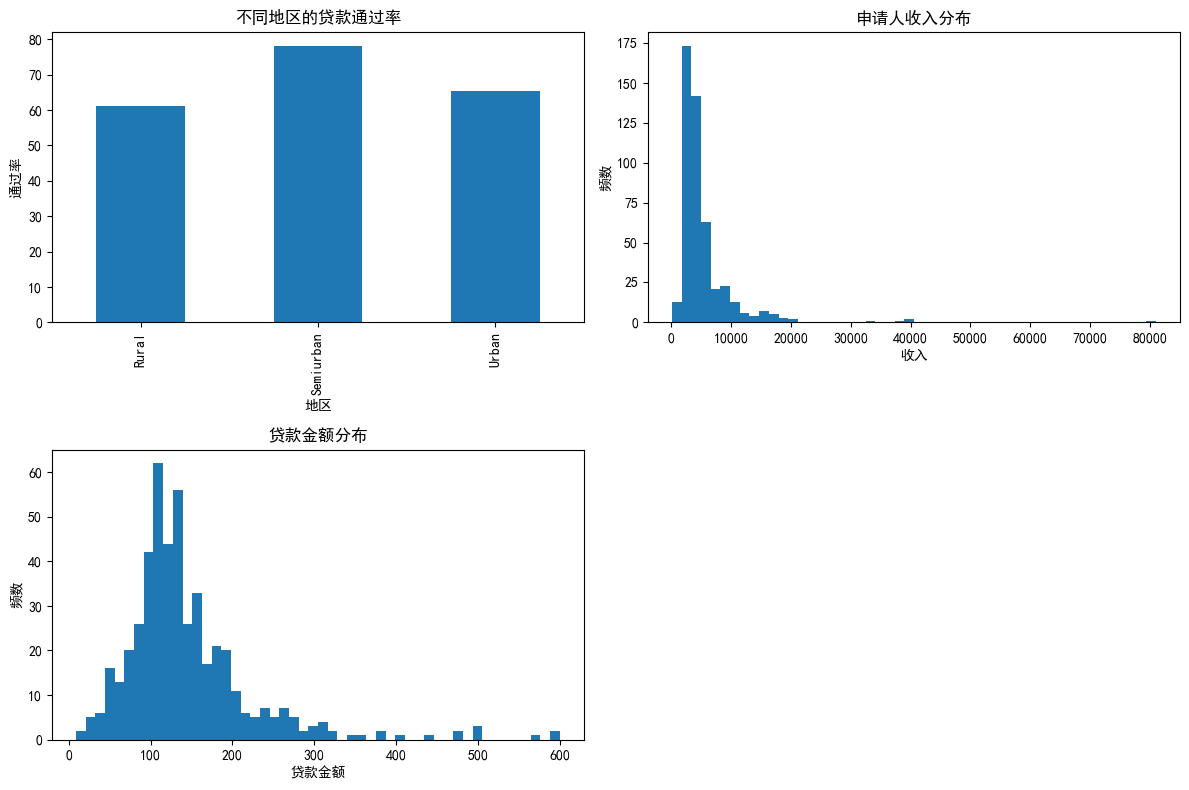

In [7]:
# 可视化
plt.figure(figsize=(12, 8))
# 贷款通过率
plt.subplot(2, 2, 1)
loan_rates = data.groupby('Property_Area')['Loan_Status'].apply(lambda x: (x == 'Y').mean() * 100)
loan_rates.plot(kind='bar')
plt.title('不同地区的贷款通过率')
plt.xlabel('地区')
plt.ylabel('通过率')

# 收入分布
plt.subplot(2, 2, 2)
plt.hist(data['ApplicantIncome'], bins=50)
plt.title('申请人收入分布')
plt.xlabel('收入')
plt.ylabel('频数')

# 贷款金额分布
plt.subplot(2, 2, 3)
plt.hist(data['LoanAmount'], bins=50)
plt.title('贷款金额分布')
plt.xlabel('贷款金额')
plt.ylabel('频数')
plt.tight_layout()
plt.show()


In [8]:
# 转成np.array
y = (data['Loan_Status'] == 'Y').astype(int)
# 分类数值化
X = pd.get_dummies(X, columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents', 'Credit_History'])
X = np.array(X.values,dtype=float)
y = np.array(y.values, dtype=float)


In [9]:
# 模型训练
model = LogisticRegression(times=20000)
model.fit(X, y)

#模型准确率评估
acc = model.evaluate(X, y)
print(f"准确率：{acc}")


准确率：0.8125
